In [1]:
from models.DAX import DAX_quantile_regression, DAX_baseline
from models.energy import energy_quantile_regression
from functions import get_energy,get_DAX,merge_submissions,check_submission
from functions.prepare_data import split_time
from functions.evaluation import evaluate_horizon
from tqdm import tqdm
from functions import evaluate_model_revised
from models.energy import energy_baseline
from models.energy import energy_LSTM

In [2]:
# Load data
energy = get_energy.get()

  0%|          | 0/264 [00:00<?, ?it/s]/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/functions/get_energy.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  energydata = pd.concat([energydata, pd.DataFrame(rawdata, columns=col_names)])
100%|██████████| 264/264 [00:36<00:00,  7.17it/s]


In [3]:
energy

,gesamt,weekday
date_time,,
2018-12-24 00:00:00,42.02925,0
2018-12-24 01:00:00,39.61025,0
2018-12-24 02:00:00,39.13875,0
2018-12-24 03:00:00,39.42100,0
2018-12-24 04:00:00,40.74775,0
...,...,...
2024-01-12 07:00:00,66.87325,4
2024-01-12 08:00:00,69.88425,4
2024-01-12 09:00:00,71.32400,4


In [4]:
baseline_model = {
    'name': 'Baseline Model',
    'function': energy_baseline.energy_baseline
}
LSTM_model = {
    'name': 'Energy LSTM',
    'function': energy_LSTM.energy_forecast
}


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
2024-01-12 12:20:38.649164: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not

Epoch 1/10


2024-01-12 12:20:38.956549: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 12:20:38.958225: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 12:20:38.959266: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

303/303 - 5s - loss: 0.8455 - val_loss: 0.8333 - 5s/epoch - 15ms/step
Epoch 2/10
303/303 - 2s - loss: 0.8346 - val_loss: 0.8250 - 2s/epoch - 5ms/step
Epoch 3/10
303/303 - 2s - loss: 0.8218 - val_loss: 0.8143 - 2s/epoch - 6ms/step
Epoch 4/10
303/303 - 2s - loss: 0.8102 - val_loss: 0.8199 - 2s/epoch - 6ms/step
Epoch 5/10
303/303 - 2s - loss: 0.8055 - val_loss: 0.8159 - 2s/epoch - 6ms/step
Epoch 6/10
303/303 - 2s - loss: 0.8008 - val_loss: 0.8108 - 2s/epoch - 7ms/step
Epoch 7/10
303/303 - 2s - loss: 0.7969 - val_loss: 0.8068 - 2s/epoch - 8ms/step
Epoch 8/10
303/303 - 2s - loss: 0.7937 - val_loss: 0.8031 - 2s/epoch - 8ms/step
Epoch 9/10
303/303 - 2s - loss: 0.7909 - val_loss: 0.7998 - 2s/epoch - 6ms/step
Epoch 10/10
303/303 - 2s - loss: 0.7885 - val_loss: 0.7979 - 2s/epoch - 5ms/step


2024-01-12 12:21:01.237106: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 12:21:01.238059: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 12:21:01.238870: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 425ms/step


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
2024-01-12 12:21:01.729083: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not

Epoch 1/10


2024-01-12 12:21:01.840355: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 12:21:01.841406: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 12:21:01.841980: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

303/303 - 5s - loss: 0.8452 - val_loss: 0.8399 - 5s/epoch - 16ms/step
Epoch 2/10
303/303 - 2s - loss: 0.8332 - val_loss: 0.8300 - 2s/epoch - 6ms/step
Epoch 3/10
303/303 - 2s - loss: 0.8189 - val_loss: 0.8213 - 2s/epoch - 5ms/step
Epoch 4/10
303/303 - 2s - loss: 0.8085 - val_loss: 0.8218 - 2s/epoch - 7ms/step
Epoch 5/10
303/303 - 2s - loss: 0.8030 - val_loss: 0.8170 - 2s/epoch - 5ms/step
Epoch 6/10
303/303 - 2s - loss: 0.7981 - val_loss: 0.8127 - 2s/epoch - 5ms/step
Epoch 7/10
303/303 - 2s - loss: 0.7942 - val_loss: 0.8092 - 2s/epoch - 5ms/step
Epoch 8/10
303/303 - 2s - loss: 0.7913 - val_loss: 0.8062 - 2s/epoch - 5ms/step
Epoch 9/10
303/303 - 2s - loss: 0.7889 - val_loss: 0.8040 - 2s/epoch - 5ms/step
Epoch 10/10
303/303 - 2s - loss: 0.7870 - val_loss: 0.8020 - 2s/epoch - 8ms/step


2024-01-12 12:21:22.508924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 12:21:22.509775: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 12:21:22.510678: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 420ms/step


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
2024-01-12 12:21:23.033523: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not

Epoch 1/10


2024-01-12 12:21:23.143496: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 12:21:23.144630: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 12:21:23.145395: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

304/304 - 4s - loss: 0.8454 - val_loss: 0.8410 - 4s/epoch - 12ms/step
Epoch 2/10
304/304 - 2s - loss: 0.8325 - val_loss: 0.8319 - 2s/epoch - 5ms/step
Epoch 3/10
304/304 - 2s - loss: 0.8193 - val_loss: 0.8215 - 2s/epoch - 5ms/step
Epoch 4/10
304/304 - 2s - loss: 0.8086 - val_loss: 0.8216 - 2s/epoch - 5ms/step
Epoch 5/10
304/304 - 2s - loss: 0.8035 - val_loss: 0.8175 - 2s/epoch - 5ms/step
Epoch 6/10
304/304 - 2s - loss: 0.7989 - val_loss: 0.8134 - 2s/epoch - 5ms/step
Epoch 7/10
304/304 - 2s - loss: 0.7950 - val_loss: 0.8103 - 2s/epoch - 5ms/step
Epoch 8/10
304/304 - 2s - loss: 0.7918 - val_loss: 0.8077 - 2s/epoch - 6ms/step
Epoch 9/10
304/304 - 2s - loss: 0.7892 - val_loss: 0.8063 - 2s/epoch - 7ms/step
Epoch 10/10
304/304 - 2s - loss: 0.7871 - val_loss: 0.8051 - 2s/epoch - 5ms/step


2024-01-12 12:21:42.089551: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 12:21:42.090657: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 12:21:42.091314: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 392ms/step


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
2024-01-12 12:21:42.598070: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not

Epoch 1/10


2024-01-12 12:21:42.705434: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 12:21:42.706352: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 12:21:42.706970: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

304/304 - 5s - loss: 0.8454 - val_loss: 0.8430 - 5s/epoch - 15ms/step
Epoch 2/10
304/304 - 2s - loss: 0.8333 - val_loss: 0.8337 - 2s/epoch - 5ms/step
Epoch 3/10
304/304 - 2s - loss: 0.8192 - val_loss: 0.8225 - 2s/epoch - 5ms/step
Epoch 4/10
304/304 - 2s - loss: 0.8080 - val_loss: 0.8230 - 2s/epoch - 5ms/step
Epoch 5/10
304/304 - 2s - loss: 0.8030 - val_loss: 0.8191 - 2s/epoch - 6ms/step
Epoch 6/10
304/304 - 2s - loss: 0.7985 - val_loss: 0.8158 - 2s/epoch - 6ms/step
Epoch 7/10
304/304 - 2s - loss: 0.7947 - val_loss: 0.8128 - 2s/epoch - 6ms/step
Epoch 8/10
304/304 - 2s - loss: 0.7915 - val_loss: 0.8099 - 2s/epoch - 7ms/step
Epoch 9/10
304/304 - 2s - loss: 0.7889 - val_loss: 0.8076 - 2s/epoch - 5ms/step
Epoch 10/10
304/304 - 2s - loss: 0.7867 - val_loss: 0.8056 - 2s/epoch - 5ms/step


2024-01-12 12:22:02.925567: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 12:22:02.926610: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 12:22:02.927282: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 404ms/step


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour


Epoch 1/10


2024-01-12 12:22:03.442563: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 12:22:03.443427: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 12:22:03.444081: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

304/304 - 4s - loss: 0.8453 - val_loss: 0.8417 - 4s/epoch - 12ms/step
Epoch 2/10
304/304 - 2s - loss: 0.8328 - val_loss: 0.8304 - 2s/epoch - 6ms/step
Epoch 3/10
304/304 - 2s - loss: 0.8187 - val_loss: 0.8191 - 2s/epoch - 6ms/step
Epoch 4/10
304/304 - 2s - loss: 0.8087 - val_loss: 0.8194 - 2s/epoch - 6ms/step
Epoch 5/10
304/304 - 2s - loss: 0.8039 - val_loss: 0.8152 - 2s/epoch - 5ms/step
Epoch 6/10
304/304 - 2s - loss: 0.7994 - val_loss: 0.8112 - 2s/epoch - 6ms/step
Epoch 7/10
304/304 - 2s - loss: 0.7955 - val_loss: 0.8076 - 2s/epoch - 5ms/step
Epoch 8/10
304/304 - 2s - loss: 0.7922 - val_loss: 0.8048 - 2s/epoch - 5ms/step
Epoch 9/10
304/304 - 2s - loss: 0.7896 - val_loss: 0.8030 - 2s/epoch - 5ms/step
Epoch 10/10
304/304 - 2s - loss: 0.7875 - val_loss: 0.8015 - 2s/epoch - 5ms/step


2024-01-12 12:22:22.518659: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 12:22:22.519317: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 12:22:22.520298: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 1s 699ms/step


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
2024-01-12 12:22:23.311062: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not

Epoch 1/10


2024-01-12 12:22:23.420626: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 12:22:23.422451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 12:22:23.423439: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

304/304 - 4s - loss: 0.8458 - val_loss: 0.8382 - 4s/epoch - 12ms/step
Epoch 2/10
304/304 - 2s - loss: 0.8326 - val_loss: 0.8260 - 2s/epoch - 5ms/step
Epoch 3/10
304/304 - 2s - loss: 0.8183 - val_loss: 0.8172 - 2s/epoch - 5ms/step
Epoch 4/10
304/304 - 2s - loss: 0.8094 - val_loss: 0.8178 - 2s/epoch - 5ms/step
Epoch 5/10
304/304 - 2s - loss: 0.8051 - val_loss: 0.8145 - 2s/epoch - 5ms/step
Epoch 6/10
304/304 - 2s - loss: 0.8011 - val_loss: 0.8102 - 2s/epoch - 5ms/step
Epoch 7/10
304/304 - 2s - loss: 0.7974 - val_loss: 0.8064 - 2s/epoch - 5ms/step
Epoch 8/10
304/304 - 1s - loss: 0.7941 - val_loss: 0.8032 - 1s/epoch - 5ms/step
Epoch 9/10
304/304 - 2s - loss: 0.7913 - val_loss: 0.8003 - 2s/epoch - 6ms/step
Epoch 10/10
304/304 - 2s - loss: 0.7888 - val_loss: 0.7983 - 2s/epoch - 5ms/step


2024-01-12 12:22:41.175353: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 12:22:41.176374: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 12:22:41.177183: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 377ms/step


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
2024-01-12 12:22:41.662536: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not

Epoch 1/10


2024-01-12 12:22:41.768378: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 12:22:41.769327: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 12:22:41.769930: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

305/305 - 4s - loss: 0.8463 - val_loss: 0.8398 - 4s/epoch - 13ms/step
Epoch 2/10
305/305 - 2s - loss: 0.8340 - val_loss: 0.8305 - 2s/epoch - 5ms/step
Epoch 3/10
305/305 - 2s - loss: 0.8201 - val_loss: 0.8176 - 2s/epoch - 5ms/step
Epoch 4/10
305/305 - 2s - loss: 0.8088 - val_loss: 0.8195 - 2s/epoch - 5ms/step
Epoch 5/10
305/305 - 2s - loss: 0.8041 - val_loss: 0.8146 - 2s/epoch - 5ms/step
Epoch 6/10
305/305 - 2s - loss: 0.7995 - val_loss: 0.8096 - 2s/epoch - 5ms/step
Epoch 7/10
305/305 - 2s - loss: 0.7957 - val_loss: 0.8054 - 2s/epoch - 5ms/step
Epoch 8/10
305/305 - 1s - loss: 0.7926 - val_loss: 0.8023 - 1s/epoch - 5ms/step
Epoch 9/10
305/305 - 1s - loss: 0.7901 - val_loss: 0.8002 - 1s/epoch - 5ms/step
Epoch 10/10
305/305 - 1s - loss: 0.7882 - val_loss: 0.7985 - 1s/epoch - 5ms/step


2024-01-12 12:22:59.362840: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 12:22:59.364018: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 12:22:59.364797: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 368ms/step


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
2024-01-12 12:22:59.834242: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not

Epoch 1/10


2024-01-12 12:22:59.939480: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 12:22:59.940200: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 12:22:59.940857: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

305/305 - 4s - loss: 0.8465 - val_loss: 0.8428 - 4s/epoch - 12ms/step
Epoch 2/10
305/305 - 2s - loss: 0.8334 - val_loss: 0.8312 - 2s/epoch - 5ms/step
Epoch 3/10
305/305 - 2s - loss: 0.8185 - val_loss: 0.8209 - 2s/epoch - 5ms/step
Epoch 4/10
305/305 - 2s - loss: 0.8084 - val_loss: 0.8217 - 2s/epoch - 5ms/step
Epoch 5/10
305/305 - 2s - loss: 0.8034 - val_loss: 0.8171 - 2s/epoch - 5ms/step
Epoch 6/10
305/305 - 2s - loss: 0.7990 - val_loss: 0.8127 - 2s/epoch - 5ms/step
Epoch 7/10
305/305 - 2s - loss: 0.7953 - val_loss: 0.8097 - 2s/epoch - 5ms/step
Epoch 8/10
305/305 - 2s - loss: 0.7926 - val_loss: 0.8073 - 2s/epoch - 5ms/step
Epoch 9/10
305/305 - 2s - loss: 0.7904 - val_loss: 0.8061 - 2s/epoch - 5ms/step
Epoch 10/10
305/305 - 2s - loss: 0.7887 - val_loss: 0.8049 - 2s/epoch - 5ms/step


2024-01-12 12:23:17.584718: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 12:23:17.585841: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 12:23:17.586533: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 382ms/step


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
2024-01-12 12:23:18.070625: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not

Epoch 1/10


2024-01-12 12:23:18.659862: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 12:23:18.660876: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 12:23:18.661601: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

305/305 - 3s - loss: 0.8465 - val_loss: 0.8447 - 3s/epoch - 11ms/step
Epoch 2/10
305/305 - 2s - loss: 0.8352 - val_loss: 0.8356 - 2s/epoch - 5ms/step
Epoch 3/10
305/305 - 2s - loss: 0.8217 - val_loss: 0.8232 - 2s/epoch - 5ms/step
Epoch 4/10
305/305 - 2s - loss: 0.8100 - val_loss: 0.8264 - 2s/epoch - 5ms/step
Epoch 5/10
305/305 - 2s - loss: 0.8053 - val_loss: 0.8212 - 2s/epoch - 5ms/step
Epoch 6/10
305/305 - 2s - loss: 0.8005 - val_loss: 0.8166 - 2s/epoch - 5ms/step
Epoch 7/10
305/305 - 2s - loss: 0.7966 - val_loss: 0.8127 - 2s/epoch - 5ms/step
Epoch 8/10
305/305 - 2s - loss: 0.7934 - val_loss: 0.8099 - 2s/epoch - 5ms/step
Epoch 9/10
305/305 - 2s - loss: 0.7909 - val_loss: 0.8080 - 2s/epoch - 5ms/step
Epoch 10/10
305/305 - 2s - loss: 0.7889 - val_loss: 0.8067 - 2s/epoch - 5ms/step


2024-01-12 12:23:36.120961: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 12:23:36.121908: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 12:23:36.122710: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 385ms/step


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
2024-01-12 12:23:36.619112: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not

Epoch 1/10


2024-01-12 12:23:36.726407: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 12:23:36.727305: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 12:23:36.727899: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

306/306 - 4s - loss: 0.8453 - val_loss: 0.8445 - 4s/epoch - 12ms/step
Epoch 2/10
306/306 - 2s - loss: 0.8336 - val_loss: 0.8338 - 2s/epoch - 5ms/step
Epoch 3/10
306/306 - 2s - loss: 0.8192 - val_loss: 0.8223 - 2s/epoch - 5ms/step
Epoch 4/10
306/306 - 2s - loss: 0.8088 - val_loss: 0.8236 - 2s/epoch - 5ms/step
Epoch 5/10
306/306 - 2s - loss: 0.8044 - val_loss: 0.8176 - 2s/epoch - 5ms/step
Epoch 6/10
306/306 - 2s - loss: 0.8000 - val_loss: 0.8116 - 2s/epoch - 5ms/step
Epoch 7/10
306/306 - 2s - loss: 0.7962 - val_loss: 0.8074 - 2s/epoch - 5ms/step
Epoch 8/10
306/306 - 2s - loss: 0.7932 - val_loss: 0.8039 - 2s/epoch - 5ms/step
Epoch 9/10
306/306 - 2s - loss: 0.7906 - val_loss: 0.8014 - 2s/epoch - 5ms/step
Epoch 10/10
306/306 - 2s - loss: 0.7885 - val_loss: 0.7997 - 2s/epoch - 5ms/step


2024-01-12 12:23:54.582535: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 12:23:54.583468: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 12:23:54.584259: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 366ms/step


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
2024-01-12 12:23:55.073221: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not

Epoch 1/10


2024-01-12 12:23:55.180888: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 12:23:55.181757: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 12:23:55.182326: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

306/306 - 4s - loss: 0.8457 - val_loss: 0.8432 - 4s/epoch - 13ms/step
Epoch 2/10
306/306 - 2s - loss: 0.8318 - val_loss: 0.8301 - 2s/epoch - 5ms/step
Epoch 3/10
306/306 - 1s - loss: 0.8168 - val_loss: 0.8198 - 1s/epoch - 5ms/step
Epoch 4/10
306/306 - 1s - loss: 0.8083 - val_loss: 0.8200 - 1s/epoch - 5ms/step
Epoch 5/10
306/306 - 2s - loss: 0.8041 - val_loss: 0.8153 - 2s/epoch - 5ms/step
Epoch 6/10
306/306 - 2s - loss: 0.8000 - val_loss: 0.8096 - 2s/epoch - 5ms/step
Epoch 7/10
306/306 - 1s - loss: 0.7965 - val_loss: 0.8050 - 1s/epoch - 5ms/step
Epoch 8/10
306/306 - 1s - loss: 0.7936 - val_loss: 0.8015 - 1s/epoch - 5ms/step
Epoch 9/10
306/306 - 1s - loss: 0.7913 - val_loss: 0.7985 - 1s/epoch - 5ms/step
Epoch 10/10
306/306 - 1s - loss: 0.7893 - val_loss: 0.7965 - 1s/epoch - 5ms/step


2024-01-12 12:24:12.672825: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 12:24:12.673474: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 12:24:12.674170: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 360ms/step


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
2024-01-12 12:24:13.140210: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not

Epoch 1/10


2024-01-12 12:24:13.249298: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 12:24:13.250245: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 12:24:13.251045: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

306/306 - 4s - loss: 0.8446 - val_loss: 0.8444 - 4s/epoch - 13ms/step
Epoch 2/10
306/306 - 2s - loss: 0.8321 - val_loss: 0.8329 - 2s/epoch - 5ms/step
Epoch 3/10
306/306 - 2s - loss: 0.8175 - val_loss: 0.8195 - 2s/epoch - 5ms/step
Epoch 4/10
306/306 - 2s - loss: 0.8074 - val_loss: 0.8218 - 2s/epoch - 6ms/step
Epoch 5/10
306/306 - 2s - loss: 0.8030 - val_loss: 0.8174 - 2s/epoch - 6ms/step
Epoch 6/10
306/306 - 2s - loss: 0.7987 - val_loss: 0.8130 - 2s/epoch - 5ms/step
Epoch 7/10
306/306 - 2s - loss: 0.7950 - val_loss: 0.8092 - 2s/epoch - 5ms/step
Epoch 8/10
306/306 - 1s - loss: 0.7921 - val_loss: 0.8059 - 1s/epoch - 5ms/step
Epoch 9/10
306/306 - 1s - loss: 0.7897 - val_loss: 0.8035 - 1s/epoch - 5ms/step
Epoch 10/10
306/306 - 1s - loss: 0.7877 - val_loss: 0.8017 - 1s/epoch - 5ms/step


2024-01-12 12:24:31.409389: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 12:24:31.410452: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 12:24:31.411105: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 381ms/step


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
2024-01-12 12:24:31.899993: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not

Epoch 1/10


2024-01-12 12:24:32.009945: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 12:24:32.010812: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 12:24:32.011523: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

306/306 - 4s - loss: 0.8462 - val_loss: 0.8446 - 4s/epoch - 13ms/step
Epoch 2/10
306/306 - 1s - loss: 0.8333 - val_loss: 0.8327 - 1s/epoch - 5ms/step
Epoch 3/10
306/306 - 1s - loss: 0.8178 - val_loss: 0.8208 - 1s/epoch - 5ms/step
Epoch 4/10
306/306 - 1s - loss: 0.8071 - val_loss: 0.8231 - 1s/epoch - 5ms/step
Epoch 5/10
306/306 - 1s - loss: 0.8023 - val_loss: 0.8187 - 1s/epoch - 5ms/step
Epoch 6/10
306/306 - 1s - loss: 0.7978 - val_loss: 0.8145 - 1s/epoch - 5ms/step
Epoch 7/10
306/306 - 1s - loss: 0.7942 - val_loss: 0.8109 - 1s/epoch - 5ms/step
Epoch 8/10
306/306 - 1s - loss: 0.7914 - val_loss: 0.8080 - 1s/epoch - 5ms/step
Epoch 9/10
306/306 - 1s - loss: 0.7892 - val_loss: 0.8058 - 1s/epoch - 5ms/step
Epoch 10/10
306/306 - 2s - loss: 0.7876 - val_loss: 0.8039 - 2s/epoch - 5ms/step


2024-01-12 12:24:49.683379: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 12:24:49.684073: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 12:24:49.684924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 357ms/step


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
2024-01-12 12:24:50.144594: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not

Epoch 1/10


2024-01-12 12:24:50.251682: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 12:24:50.252686: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 12:24:50.253325: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

307/307 - 4s - loss: 0.8456 - val_loss: 0.8427 - 4s/epoch - 11ms/step
Epoch 2/10
307/307 - 2s - loss: 0.8330 - val_loss: 0.8308 - 2s/epoch - 5ms/step
Epoch 3/10
307/307 - 2s - loss: 0.8176 - val_loss: 0.8204 - 2s/epoch - 5ms/step
Epoch 4/10
307/307 - 2s - loss: 0.8077 - val_loss: 0.8220 - 2s/epoch - 5ms/step
Epoch 5/10
307/307 - 2s - loss: 0.8032 - val_loss: 0.8178 - 2s/epoch - 5ms/step
Epoch 6/10
307/307 - 2s - loss: 0.7988 - val_loss: 0.8134 - 2s/epoch - 5ms/step
Epoch 7/10
307/307 - 2s - loss: 0.7951 - val_loss: 0.8100 - 2s/epoch - 5ms/step
Epoch 8/10
307/307 - 2s - loss: 0.7922 - val_loss: 0.8072 - 2s/epoch - 5ms/step
Epoch 9/10
307/307 - 2s - loss: 0.7898 - val_loss: 0.8055 - 2s/epoch - 5ms/step
Epoch 10/10
307/307 - 2s - loss: 0.7878 - val_loss: 0.8043 - 2s/epoch - 5ms/step


2024-01-12 12:25:07.612505: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 12:25:07.613318: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 12:25:07.614067: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 362ms/step


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
2024-01-12 12:25:08.087980: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not

Epoch 1/10


2024-01-12 12:25:08.195432: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 12:25:08.196208: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 12:25:08.196941: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

307/307 - 4s - loss: 0.8470 - val_loss: 0.8445 - 4s/epoch - 12ms/step
Epoch 2/10
307/307 - 1s - loss: 0.8339 - val_loss: 0.8320 - 1s/epoch - 5ms/step
Epoch 3/10
307/307 - 1s - loss: 0.8190 - val_loss: 0.8193 - 1s/epoch - 5ms/step
Epoch 4/10
307/307 - 2s - loss: 0.8090 - val_loss: 0.8196 - 2s/epoch - 5ms/step
Epoch 5/10
307/307 - 2s - loss: 0.8043 - val_loss: 0.8145 - 2s/epoch - 7ms/step
Epoch 6/10
307/307 - 2s - loss: 0.7996 - val_loss: 0.8089 - 2s/epoch - 5ms/step
Epoch 7/10
307/307 - 2s - loss: 0.7956 - val_loss: 0.8043 - 2s/epoch - 5ms/step
Epoch 8/10
307/307 - 2s - loss: 0.7923 - val_loss: 0.8008 - 2s/epoch - 5ms/step
Epoch 9/10
307/307 - 1s - loss: 0.7899 - val_loss: 0.7984 - 1s/epoch - 5ms/step
Epoch 10/10
307/307 - 1s - loss: 0.7879 - val_loss: 0.7968 - 1s/epoch - 5ms/step


2024-01-12 12:25:26.531104: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 12:25:26.532166: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 12:25:26.532837: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 384ms/step


/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldc

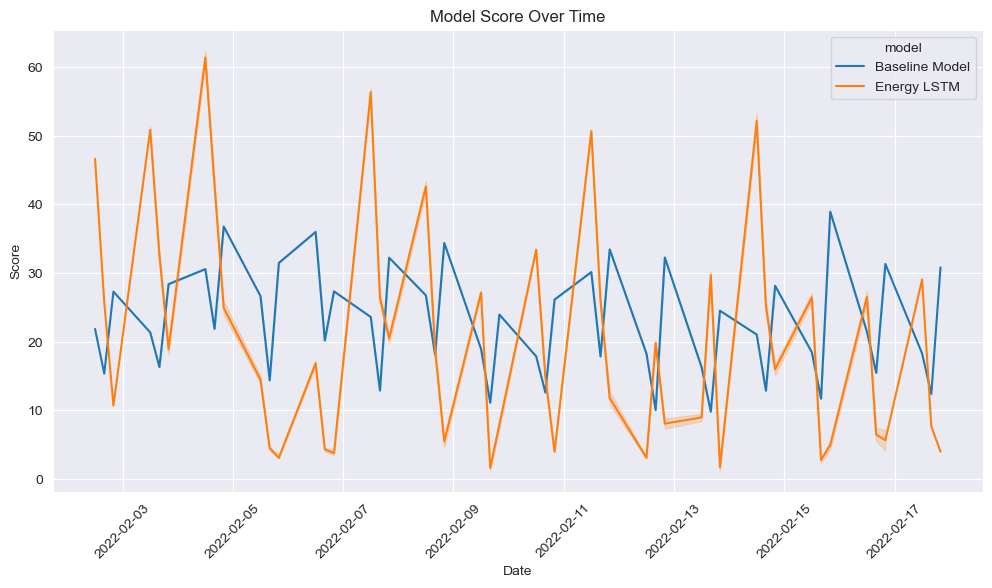

In [5]:
start_date = '2022-02-01'
end_date = '2022-02-15'

evaluation_model1, evaluation_model2, grouped_scores = evaluate_model_revised.evaluate(baseline_model, LSTM_model, energy, start_date, end_date, horizon_format="hours")

In [6]:
evaluation_model1

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975,actual_forecast_date,gesamt,weekday,score,model
0,2022-02-01,energy,36 hour,58.871450,64.338313,67.069375,70.449875,76.481887,2022-02-02 12:00:00+01:00,75.29250,2,21.844678,Baseline Model
1,2022-02-01,energy,40 hour,56.608094,61.109188,63.621000,69.932375,77.224275,2022-02-02 16:00:00+01:00,71.12125,2,15.320403,Baseline Model
2,2022-02-01,energy,44 hour,52.647250,55.703000,58.693500,62.766688,66.638238,2022-02-02 20:00:00+01:00,68.11000,2,27.278043,Baseline Model
3,2022-02-01,energy,60 hour,53.336875,64.185937,66.551875,70.590625,75.597156,2022-02-03 12:00:00+01:00,74.92050,3,21.343733,Baseline Model
4,2022-02-01,energy,64 hour,52.647975,60.605625,63.577375,69.725625,77.007975,2022-02-03 16:00:00+01:00,71.17800,3,16.283375,Baseline Model
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2022-02-15,energy,40 hour,56.608094,61.109188,63.621000,69.998000,77.224275,2022-02-16 16:00:00+01:00,71.19300,2,15.437215,Baseline Model
2,2022-02-15,energy,44 hour,52.647250,55.703000,58.693500,62.786187,66.638238,2022-02-16 20:00:00+01:00,68.92375,2,31.317543,Baseline Model
3,2022-02-15,energy,60 hour,53.336875,64.185937,66.551875,70.886313,75.597156,2022-02-17 12:00:00+01:00,74.03500,3,18.243702,Baseline Model
4,2022-02-15,energy,64 hour,52.647975,60.605625,63.577375,70.671875,77.007975,2022-02-17 16:00:00+01:00,69.66375,3,12.337500,Baseline Model


In [7]:
evaluation_model2

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975,actual_forecast_date,gesamt,weekday,score,model
0,2022-02-01,energy,36 hour,65.669708,65.754364,65.655121,66.188271,65.997879,2022-02-02 12:00:00+01:00,75.29250,2,46.668442,Energy LSTM
1,2022-02-01,energy,40 hour,65.675613,65.765038,65.668106,66.207047,66.013748,2022-02-02 16:00:00+01:00,71.12125,2,25.734466,Energy LSTM
2,2022-02-01,energy,44 hour,65.674065,65.765556,65.668732,66.213654,66.018959,2022-02-02 20:00:00+01:00,68.11000,2,10.657336,Energy LSTM
3,2022-02-01,energy,60 hour,64.427353,64.650078,64.533104,64.956047,64.950363,2022-02-03 12:00:00+01:00,74.92050,3,50.435711,Energy LSTM
4,2022-02-01,energy,64 hour,64.363113,64.598793,64.466614,64.897934,64.892349,2022-02-03 16:00:00+01:00,71.17800,3,32.018852,Energy LSTM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2022-02-15,energy,40 hour,69.821838,69.555725,69.893318,69.620514,69.734238,2022-02-16 16:00:00+01:00,71.19300,2,7.390193,Energy LSTM
2,2022-02-15,energy,44 hour,69.827011,69.560547,69.909859,69.625786,69.733910,2022-02-16 20:00:00+01:00,68.92375,2,4.094189,Energy LSTM
3,2022-02-15,energy,60 hour,68.281265,68.106934,68.433891,68.185486,68.167679,2022-02-17 12:00:00+01:00,74.03500,3,29.068376,Energy LSTM
4,2022-02-15,energy,64 hour,68.177513,68.031006,68.341499,68.108345,68.076759,2022-02-17 16:00:00+01:00,69.66375,3,7.640674,Energy LSTM


In [8]:
evaluation_model1['score'].sum()

2047.9918625

In [9]:
evaluation_model2['score'].sum()

1848.9861337203977